**JUPYTER NOTEBOOK FOR A MLP**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Trainign batch size 
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


In [0]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="sigmoid", units=100, kernel_initializer="normal"))
model.add(Dense(input_dim=100, activation="sigmoid", units=20, kernel_initializer="normal"))
model.add(Dense(input_dim=20, activation="softmax", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 45us/step - loss: 2.3001 - acc: 0.1167 - val_loss: 2.2970 - val_acc: 0.1081
Epoch 2/50
42000/42000 [==============================] - 1s 31us/step - loss: 2.2872 - acc: 0.1372 - val_loss: 2.2698 - val_acc: 0.1594
Epoch 3/50
42000/42000 [==============================] - 1s 30us/step - loss: 2.1490 - acc: 0.3019 - val_loss: 1.8814 - val_acc: 0.3992
Epoch 4/50
42000/42000 [==============================] - 1s 31us/step - loss: 1.5762 - acc: 0.4377 - val_loss: 1.3822 - val_acc: 0.4989
Epoch 5/50
42000/42000 [==============================] - 1s 30us/step - loss: 1.2813 - acc: 0.5467 - val_loss: 1.1582 - val_acc: 0.6294
Epoch 6/50
42000/42000 [==============================] - 1s 31us/step - loss: 1.0336 - acc: 0.6838 - val_loss: 0.8929 - val_acc: 0.7446
Epoch 7/50
42000/42000 [==============================] - 1s 30us/step - loss: 0

In [0]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 29us/step
Summary: Loss over the test dataset: 0.14, Accuracy: 0.96


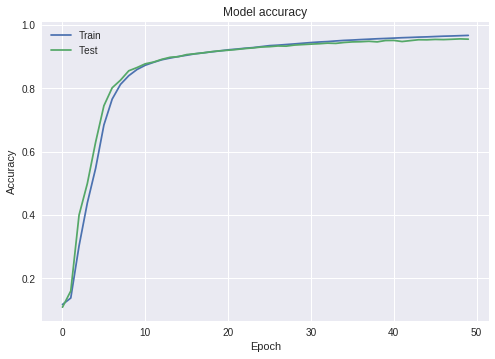

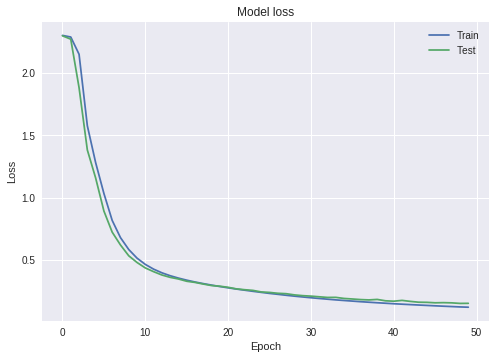

In [0]:
# Training History Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

**Question 1**: What happens if you increase/decrease the number of hidden layers?


**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer?

**Question 3:** What happens if you increase/decrease the learning rate ?

**Question 4:** What happens if you increase/decrease the number of training epochs  ?

**Question 5:** What happens if you increase/decrease the training batch size ?

**Question 6:** What happens if you use the ReLU activation function in the hidden layers ?